**FNN model** 98% accuracy

In [31]:
#import libraries
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import keras 
import matplotlib.pyplot as plt
from keras.layers import Dropout
from sklearn.linear_model  import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsOneClassifier


In [2]:
#Import the  Mnist data (images of handwritten digits and their labels)
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:

#shape of training data 
print(training_images.shape)
#28*28*3

(60000, 28, 28)


5


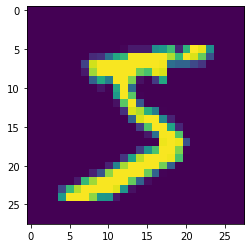

In [4]:
print(training_labels[0])
plt.imshow(training_images[0])

In [5]:
#normailze data between 0 to 1  
training_images =  training_images/255.
test_images =  test_images/255.

In [6]:
#build Network
inputs = keras.Input(shape=(28, 28))
x  =inputs
x = keras.layers.Flatten(input_shape=(28, 28))(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=x)

In [7]:
#compile model 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#early stop to avoid overfitting
callbacks= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [9]:
#fit the model with 0.1 validation data  
model.fit(training_images, training_labels, epochs=10,verbose=1,
          validation_data=(test_images, test_labels ),callbacks=[callbacks],batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 19s 2ms/step - loss: 0.4554 - accuracy: 0.8612 - val_loss: 0.1179 - val_accuracy: 0.9640
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1188 - accuracy: 0.9650 - val_loss: 0.1148 - val_accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9764 - val_loss: 0.0806 - val_accuracy: 0.9764
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0607 - accuracy: 0.9816 - val_loss: 0.0801 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0490 - accuracy: 0.9849 - val_loss: 0.0799 - val_accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0446 - accuracy: 0.9854 - val_loss: 0.0756 - val_accuracy: 0.9796
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [10]:
#evalute model 
print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.1179 - accuracy: 0.9640
[0.11785349994897842, 0.9639999866485596]


In [11]:
#predict x_test 
output =  model.predict(test_images)
output =  np.argmax(output,axis =1 )

In [12]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(test_labels, output, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.98      0.98       980
     class 1       0.98      0.98      0.98      1135
     class 2       0.95      0.97      0.96      1032
     class 3       0.96      0.97      0.97      1010
     class 4       0.98      0.96      0.97       982
     class 5       0.96      0.97      0.96       892
     class 6       0.95      0.97      0.96       958
     class 7       0.99      0.93      0.96      1028
     class 8       0.93      0.97      0.95       974
     class 9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000




FNN Results

Best test accuracy is: 97.3%

The number of parameters affects the training time




---

              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98       980
     class 1       0.99      0.99      0.99      1135
     class 2       0.98      0.97      0.97      1032
     class 3       0.98      0.98      0.98      1010
     class 4       0.97      0.97      0.97       982
     class 5       0.99      0.95      0.97       892
     class 6       0.96      0.98      0.97       958
     class 7       0.97      0.97      0.97      1028
     class 8       0.97      0.96      0.96       974
     class 9       0.96      0.98      0.97      1009

    accuracy                               0.97     10000
    macro avg          0.97      0.97      0.97     10000
    weighted avg       0.97      0.97      0.97     10000




4


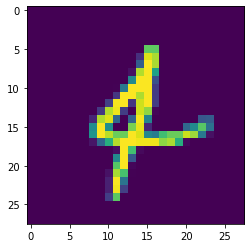

In [13]:
#test 1
print(output[300])

plt.imshow(test_images[300])

5


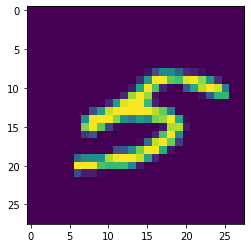

In [14]:
#test 2
print(output[167])

plt.imshow(test_images[167])

6


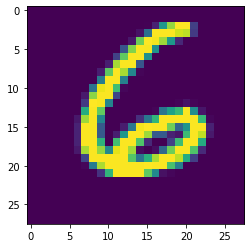

In [15]:
#test 3
print(output[384])
plt.imshow(test_images[384])

**CNN** 99.12%accuracy

In [16]:
#importing the libraries
import keras
import tensorflow as tf 
import numpy as np
import pandas as pd 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Convolution2D, MaxPooling2D,Activation,Conv2D,AveragePooling2D,GlobalMaxPool2D
from keras import backend as K

from keras import layers



In [17]:
#reshape  the data 
x_train1= training_images.reshape(training_images.shape[0],28,28,1)
x_test1= test_images.reshape(test_images.shape[0],28,28,1)

#converts a class vector to binary class matrix.
x_train1 =  x_train1/255.
x_test1 =  x_test1/255.

In [18]:
#build moodel
inputs = keras.Input(shape=(28, 28,1))
x = inputs
x = keras.layers.Conv2D(32, 5, padding='same', activation='relu', input_shape=(28, 28, 1))(x)
x = keras.layers.Conv2D(64, kernel_size=(3, 3),activation='relu')(x)
x=  keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x =  keras.layers.Dropout(0.25)(x)
x = keras.layers.Flatten(input_shape=(28, 28))(x)
x = keras.layers.Dense(256, activation='relu')(x)
x =  keras.layers.Dropout(0.15)(x)
x = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=x)

In [19]:
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

In [20]:
#fit the model 
model.fit(x_train1,training_labels,
          batch_size=64,
          epochs=10,callbacks= [callbacks],
           validation_data=(x_test1, test_labels))

Epoch 1/10
938/938 [==============================] - 36s 7ms/step - loss: 1.1385 - accuracy: 0.6134 - val_loss: 0.2246 - val_accuracy: 0.9310
Epoch 2/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2610 - accuracy: 0.9206 - val_loss: 0.1550 - val_accuracy: 0.9521
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2062 - accuracy: 0.9360 - val_loss: 0.1252 - val_accuracy: 0.9619
Epoch 4/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1623 - accuracy: 0.9492 - val_loss: 0.1118 - val_accuracy: 0.9668
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1452 - accuracy: 0.9538 - val_loss: 0.1005 - val_accuracy: 0.9693
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.1341 - accuracy: 0.9575 - val_loss: 0.0917 - val_accuracy: 0.9712
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


In [21]:
score = model.evaluate(x_test1,test_labels)
print(score)

313/313 [==============================] - 1s 2ms/step - loss: 0.2246 - accuracy: 0.9310
[0.22461843490600586, 0.9309999942779541]


In [22]:
#predict x_test1 
output1 =  model.predict(x_test1)
output1 =  np.argmax(output1,axis =1 )


In [23]:
print(len(output1))

10000


In [24]:
import pandas as pd 
su = pd.DataFrame(data=None, index=None, columns=["ImageId","Label"], dtype=None, copy=False)


In [25]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(test_labels, output1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.98      0.96       980
     class 1       0.98      0.97      0.98      1135
     class 2       0.94      0.93      0.94      1032
     class 3       0.93      0.90      0.91      1010
     class 4       0.91      0.94      0.93       982
     class 5       0.92      0.90      0.91       892
     class 6       0.96      0.94      0.95       958
     class 7       0.95      0.91      0.93      1028
     class 8       0.89      0.91      0.90       974
     class 9       0.88      0.92      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



CNN Results

Best test accuracy is: 99%

The number of parameters affects the training time



---

        precision    recall  f1-score   support

     class 0       0.99      1.00      0.99       980
     class 1       1.00      0.99      0.99      1135
     class 2       0.99      0.99      0.99      1032
     class 3       0.99      1.00      0.99      1010
     class 4       0.99      0.99      0.99       982
     class 5       1.00      0.98      0.99       892
     class 6       0.99      0.99      0.99       958
     class 7       0.99      0.99      0.99      1028
     class 8       0.99      0.99      0.99       974
     class 9       0.99      0.99      0.99      1009

    accuracy                               0.99     10000
    macro avg          0.99      0.99      0.99     10000
    weighted avg       0.99      0.99      0.99     10000



9


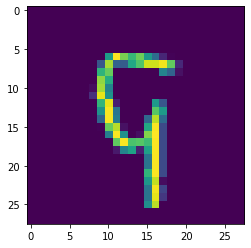

In [27]:
#test 1
print(output1[62])

plt.imshow(x_test1[62].reshape(28,28))

3


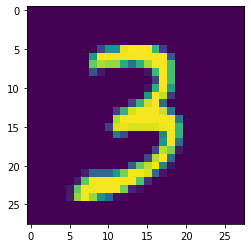

In [28]:
#test 2
print(output1[216])

plt.imshow(x_test1[216].reshape(28,28))

0


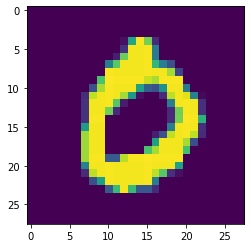

In [29]:
#test 3
print(output1[3])

plt.imshow(x_test1[3].reshape(28,28))

**KNN** accuracy 97%

In [ ]:
#import libraries
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
#reshape images 
training_images2 = training_images.reshape(60000,28*28)
test_images2 = test_images.reshape(10000,28*28)

In [ ]:
#fitting the model
knn = KNeighborsClassifier(algorithm='brute', leaf_size=20, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=5,
                     weights='uniform')
knn.fit(training_images2,training_labels)

In [ ]:
#predict the model
output2=knn.predict(test_images2)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(test_labels, output2, target_names=target_names))

KNN Results

Best test accuracy is: 92%

The number of parameters affects the training time



In [ ]:
#test 1 
print(output2[219])
plt.imshow(training_images2[219].reshape(28,28))

In [ ]:
#test 2 
print(output2[594])
plt.imshow(training_images2[594].reshape(28,28))

In [ ]:
#test 3
print(output2[301])
plt.imshow(training_images2[301].reshape(28,28))

# SGDClassifier

class sklearn.linear_model.SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)

In [40]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
sgd_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
sgd_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [41]:
#predict the model
output3=sgd_clf.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9']
print(classification_report(y_test, output3, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.96      0.97      0.97       980
     class 1       0.96      0.99      0.97      1135
     class 2       0.93      0.90      0.92      1032
     class 3       0.89      0.91      0.90      1010
     class 4       0.94      0.94      0.94       982
     class 5       0.89      0.87      0.88       892
     class 6       0.94      0.96      0.95       958
     class 7       0.93      0.92      0.93      1028
     class 8       0.90      0.85      0.88       974
     class 9       0.88      0.93      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

